Environment:
[Simple Tag](https://pettingzoo.farama.org/environments/mpe/simple_tag/)
Library with RL methods:
[machin](https://machin.readthedocs.io/en/latest/index.html)

I made modified version of Simple Tag environment which in following ways:

Adversary can be given negative rewards for both not being able to catch agent for prolonged time and for being too far from agent, this can be set up by using flags punish_lazy and punish_for_distance respectively, when creating environment

In [3]:
import numpy as np
from pettingzoo.mpe.simple_tag.simple_tag import Scenario

def adversary_reward(self, agent, world):
    rew = Scenario.adversary_reward(self, agent, world)

    if rew == 0 and self.punish_lazy:
        self.adv_lazy_counter += 1
        rew -= self.adv_lazy_counter / 10
    else:
        self.adv_lazy_counter = 0

    if self.punish_for_distance:
        # last agent is the one being chased
        pray = world.agents[len(world.agents) - 1]
        dist = np.linalg.norm(pray.state.p_pos - agent.state.p_pos)
        rew -= dist

    return rew

Agent can be set up to be slow at the beginning of the training and accelerate over time, this can be set up by using flag agent_accelerate, when creating environment, parameters of this acceleration can be set by values: agent_base_speed, agent_base_accel, agent_max_speed, agent_max_accel, where speed is how fast agent can move, and accel is how fast he accelerates

In [4]:
from pettingzoo.mpe.simple_tag.simple_tag import Scenario

def accelerate_agent(self, agent):
    if self.accelerate_counter < self.time_to_accelerate:
        agent.max_speed += self.episode_accel
        agent.accel = self.episode_accel_inc

def agent_reward(self, agent, world):
    if self.agent_accelerate:
        self.accelerate_agent(agent)
    return Scenario.agent_reward(self, agent, world)

As for now I plot 3 things
1. Running average of rewards for agent and adversaries.

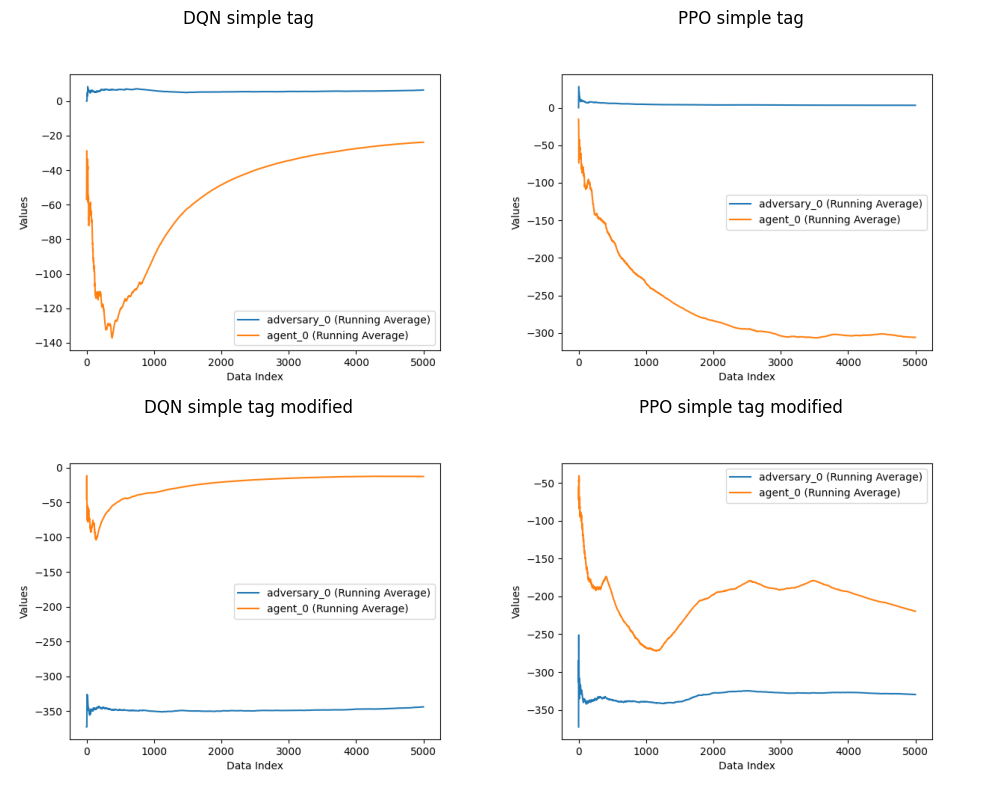

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = ['../plots/simple_tag/DQN/reward_plot.png', '../plots/simple_tag/PPO/reward_plot.png', '../plots/simple_tag_modified/DQN/reward_plot.png', '../plots/simple_tag_modified/PPO/reward_plot.png']

titles = ['DQN simple tag', 'PPO simple tag', 'DQN simple tag modified', 'PPO simple tag modified']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, (img_path, title) in enumerate(zip(image_paths, titles)):
    row = i // 2
    col = i % 2
    img = mpimg.imread(img_path)
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(title)

plt.tight_layout()
plt.show()

2. Heatmaps of positions

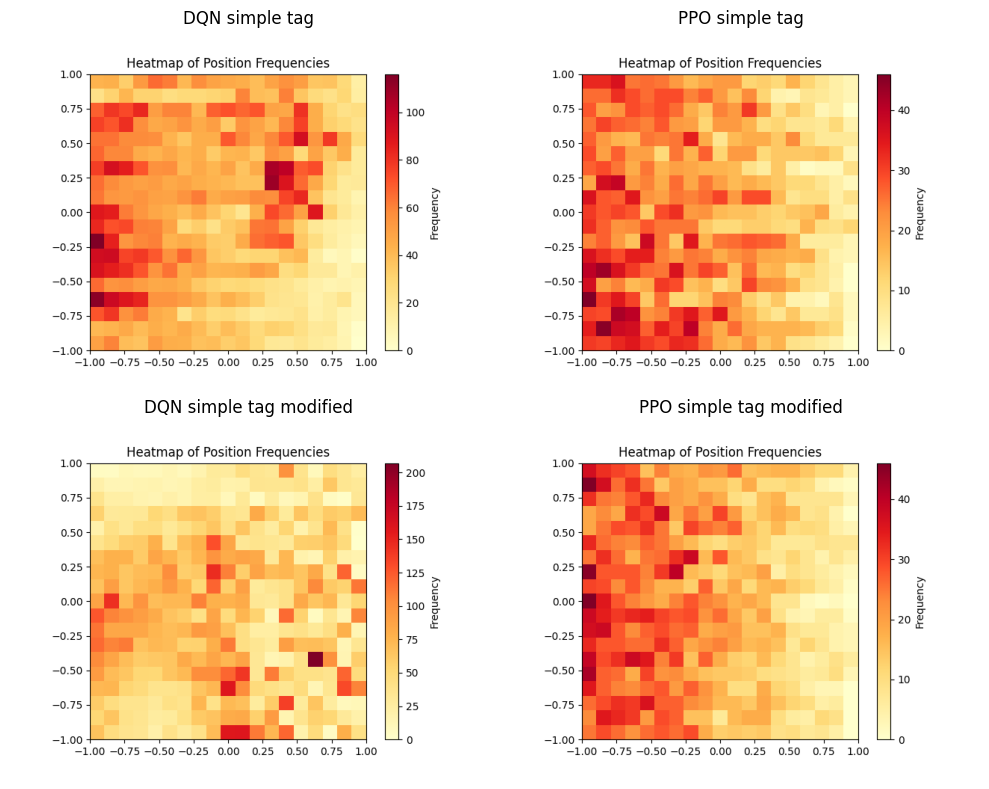

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = ['../plots/simple_tag/DQN/position_heatmaps/episode_1000_agent_0_positions.png', '../plots/simple_tag/PPO/position_heatmaps/episode_1000_agent_0_positions.png', '../plots/simple_tag_modified/DQN/position_heatmaps/episode_1000_agent_0_positions.png', '../plots/simple_tag_modified/PPO/position_heatmaps/episode_1000_agent_0_positions.png']

titles = ['DQN simple tag', 'PPO simple tag', 'DQN simple tag modified', 'PPO simple tag modified']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, (img_path, title) in enumerate(zip(image_paths, titles)):
    row = i // 2
    col = i % 2
    img = mpimg.imread(img_path)
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(title)

plt.tight_layout()
plt.show()

3. Running average of distances travelled over course of episodes

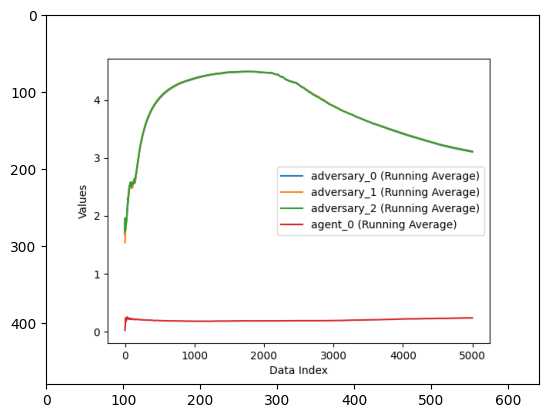

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../plots/simple_tag_modified+accelerate+distancetime/DQN/distances.png')
plt.imshow(img)
plt.show()

I also save gifs of episodes every couple of episodes

DQN simple tag


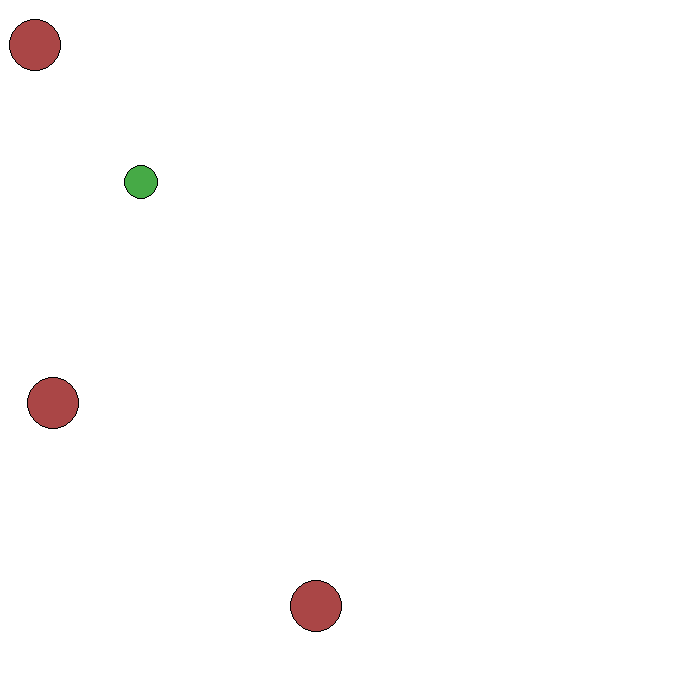

PPO simple tag


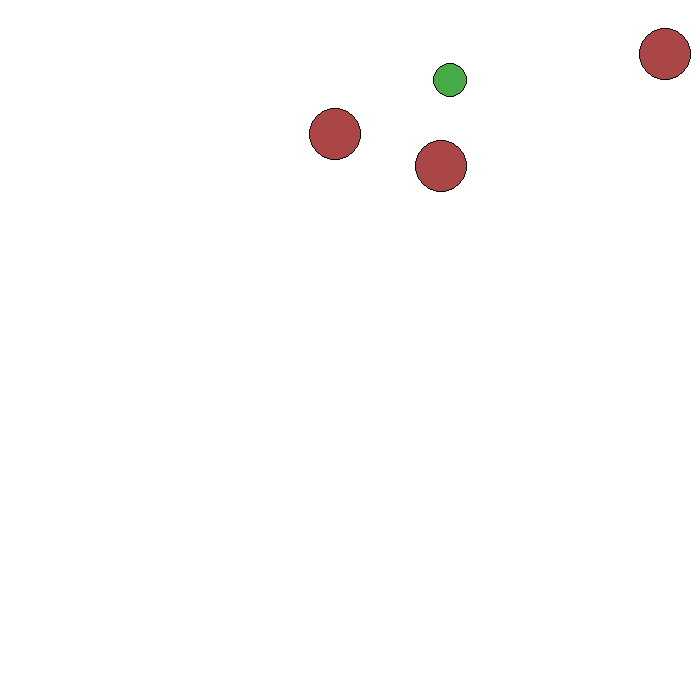

DQN simple tag modified


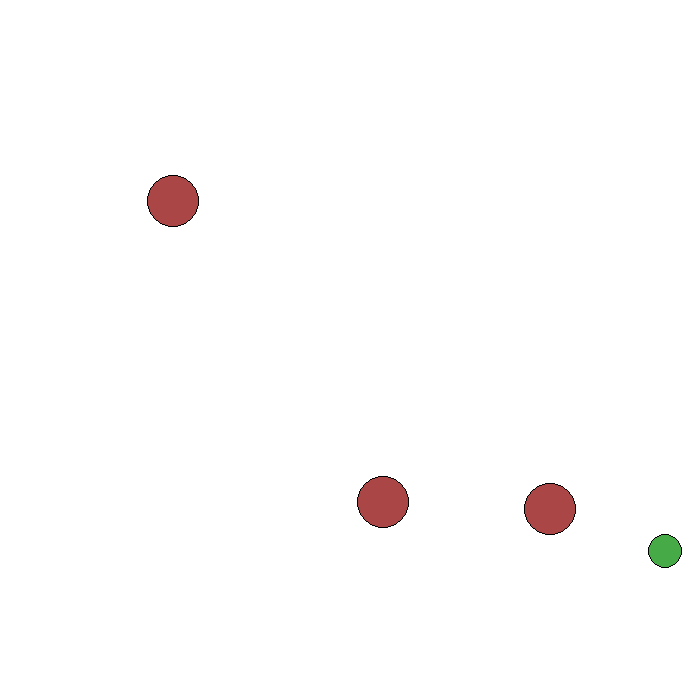

PPO simple tag modified


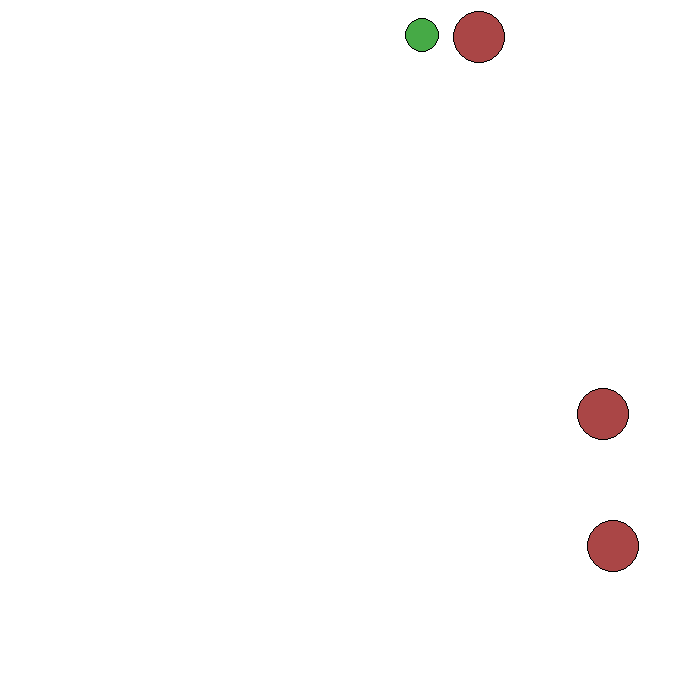

In [7]:
from IPython.display import Image, display

# List of relative paths to your saved .gif files
gif_paths = [
    '../plots/simple_tag/DQN/gifs/episode_5000.gif',
    '../plots/simple_tag/PPO/gifs/episode_5000.gif',
    '../plots/simple_tag_modified/DQN/gifs/episode_5000.gif',
    '../plots/simple_tag_modified/PPO/gifs/episode_5000.gif'
]
titles = ['DQN simple tag', 'PPO simple tag', 'DQN simple tag modified', 'PPO simple tag modified']

for gif_path, title in zip(gif_paths, titles):
    print(title)
    display(Image(filename=gif_path))